In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [2]:
from keras.datasets import mnist

Using TensorFlow backend.
/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarn

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

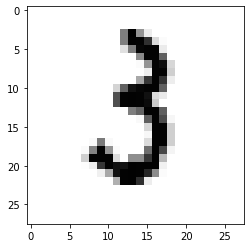

In [4]:
plt.imshow(x_train[1234], cmap = "Greys")

In [5]:
y_train[1234]

3

In [6]:
x_train[1234].shape #CNN 要的是(28, 28, 1)

(28, 28)

In [7]:
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)

In [8]:
from keras.utils import np_utils

In [9]:
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

### Q: 除以255的原因是normalization，但是255這個數字是哪裡來的？

In [10]:
x_train = x_train/255
x_test = x_test/255

### 上課版本

* 3 次 conv，3 次 max
* 2 Dense
* output: 10

filter 大小 3x3
maxpooling 2x2

通常 filter 數量會越來越多(V) or 或越來越少

* Conv01: 4
* Conv02: 8
* Conv03: 16

------------
* Dense01: 17
* Dense02: 33

------------
* loss: mse
* activation: relu
* Optimizer: SGD
* lr: 0.07

------------
* batch_size: 100
* epochs: 10



### 實驗版本1 更改Conv次數 神經元數 Dense層數 神經元數

* 5 次 conv，５次 max
* filter大小：3x3
* maxpooling: 2x2
* 4 Dense
* output: 10

* Conv01: 2
* Conv02: 4
* Conv04: 8
* Conv04: 16
* Conv05: 32

-----------
* Dense01: 9
* Dense02: 15
* Dense03: 36
* Dense04: 57

-----------
* loss: mse
* activation: relu
* Optimizer: SGD
* lr: 0.07


In [11]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.layers import Conv2D, MaxPool2D
from keras.optimizers import SGD

In [12]:
model = Sequential()

# 1

In [13]:
model.add(Conv2D(4, (3, 3), padding = 'same', input_shape = (28, 28, 1), activation = 'relu'))

In [14]:
model.add(MaxPool2D(pool_size = (2,2)))

# 2

In [15]:
model.add(Conv2D(8, (3, 3), padding = 'same', activation = 'relu'))

In [16]:
model.add(MaxPool2D(pool_size = (2,2)))

# 3

In [17]:
model.add(Conv2D(16, (3, 3), padding = 'same', activation = 'relu'))

In [18]:
model.add(MaxPool2D(pool_size = (2,2)))

# 4

Dense 層

In [19]:
model.add(Flatten())
model.add(Dense(17, activation = 'relu'))

In [20]:
model.add(Dense(33, activation = 'relu'))

# 5
output

### Q: Softmax 的意義是什麼？

In [21]:
model.add(Dense(10, activation = 'softmax'))

In [22]:
model.compile(loss='mse', optimizer=SGD(lr=0.07), metrics=['accuracy'])

In [23]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 4)         40        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 4)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 8)         296       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 16)          1168      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 3, 3, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 144)              

In [24]:
3*3*4 + 4 #3x3的filter 4個filter 每個filter 1個bias

40

In [24]:
3*3*4*8 + 8 #每個filter送出一個矩陣 4層4個矩陣

296

In [25]:
3*3*8*16 + 16

1168

# 訓練

In [26]:
model.fit(x_train, y_train, batch_size = 100, epochs = 20)


Epoch 1/20
60000/60000 [==============================] - 55s 915us/step - loss: 0.0900 - accuracy: 0.1032
Epoch 2/20
60000/60000 [==============================] - 46s 759us/step - loss: 0.0899 - accuracy: 0.1422
Epoch 3/20
60000/60000 [==============================] - 47s 785us/step - loss: 0.0898 - accuracy: 0.2080
Epoch 4/20
60000/60000 [==============================] - 46s 773us/step - loss: 0.0896 - accuracy: 0.2412
Epoch 5/20
60000/60000 [==============================] - 49s 815us/step - loss: 0.0895 - accuracy: 0.2655
Epoch 6/20
60000/60000 [==============================] - 49s 816us/step - loss: 0.0892 - accuracy: 0.2845
Epoch 7/20
60000/60000 [==============================] - 51s 849us/step - loss: 0.0888 - accuracy: 0.3035
Epoch 8/20
60000/60000 [==============================] - 47s 783us/step - loss: 0.0879 - accuracy: 0.3392
Epoch 9/20
60000/60000 [==============================] - 47s 788us/step - loss: 0.0858 - accuracy: 0.3826
Epoch 10/20
60000/60000 [===========

In [ ]:
score = model.evaluate(x_test, y_test)

In [ ]:
print(f'測試資料的 loss: {score[0]: .5f}')
print(f'測試資料的正確率: {score[1]}')

In [ ]:
model.save('myCNNmodel.h5')

In [ ]:
del model

In [ ]:
from keras.models import load_model

In [ ]:
model = load_model('myCNNmodel.h5')

In [ ]:
predict = model.predict_classes(x_test)

In [ ]:

pick = np.random.randint(1,9999, 5)

for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(x_test[pick[i]].reshape(28,28), cmap='Greys')
    plt.title(predict[pick[i]])
    plt.axis("off")